In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combined_data = pd.merge(city_data, ride_data, how="inner", on=["city", "city"])
# Display the data table for preview

## Bubble Plot of Ride Sharing Data

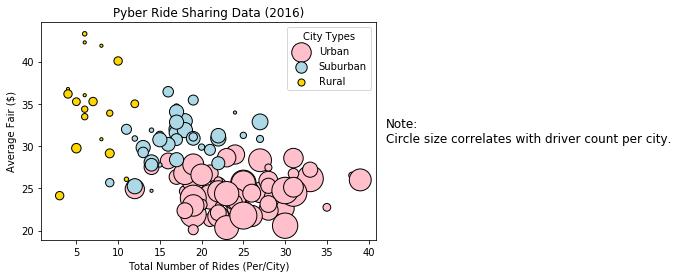

In [2]:
# Obtain the x and y coordinates for each of the three city types
urban_data = combined_data[combined_data.type == "Urban"]
suburban_data = combined_data[combined_data.type == "Suburban"]
rural_data = combined_data[combined_data.type == "Rural"]

urban_city_fairs = urban_data.groupby(["city"])["fare"].mean()
urban_city_rides = urban_data.groupby(["city"])["ride_id"].count()
urban_city_drivers = urban_data.groupby(["city"])["driver_count"].first()

suburban_city_fairs = suburban_data.groupby(["city"])["fare"].mean()
suburban_city_rides = suburban_data.groupby(["city"])["ride_id"].count()
suburban_city_drivers = suburban_data.groupby(["city"])["driver_count"].first()

rural_city_fairs = rural_data.groupby(["city"])["fare"].mean()
rural_city_rides = rural_data.groupby(["city"])["ride_id"].count()
rural_city_drivers = rural_data.groupby(["city"])["driver_count"].first()

# Build the scatter plots for each city types
plt.scatter(x=urban_city_rides, y=urban_city_fairs, s=10*urban_city_drivers, edgecolors="black", 
            label = "Urban", c="pink" )

#x_axis_s = np.arange(len(suburban_city_rides))
plt.scatter(x=suburban_city_rides, y=suburban_city_fairs,s=10*suburban_city_drivers, edgecolors="black", 
            label = "Suburban", c="lightblue" )

#x_axis_r = np.arange(len(rural_city_rides))
plt.scatter(x=rural_city_rides, y=rural_city_fairs, s=10*rural_city_drivers, edgecolors="black", 
            label = "Rural", c="gold" )

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per/City)")
plt.ylabel("Average Fair ($)")

# Incorporate the other graph properties

# Create a legend
plt.legend(loc="best", title="City Types")
# Incorporate a text label regarding circle size
plt.text(42.05, 30.5,"Note:\nCircle size correlates with driver count per city.", fontsize = 12)
# Save Figure
plt.savefig("../Images/Pyber_ridesharing_data.png")
plt.show()

## Total Fares by City Type

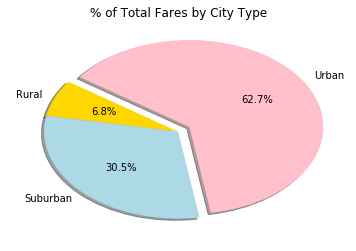

In [4]:
# Calculate Type Percents
city_fairs_byType = combined_data.groupby(["type"]).sum()["fare"]
colors = ("gold", "lightblue","pink")
# Build Pie Chart
plt.pie(city_fairs_byType, labels=city_fairs_byType.index.values, autopct="%1.1f%%", 
        startangle=145, explode=(0,0,0.1), shadow = True, colors = colors)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("../Images/Total_Fares_by_City_Type.png")
plt.show()

## Total Rides by City Type

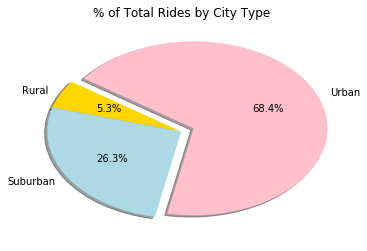

In [6]:
# Calculate Ride Percents
city_rides_byType = combined_data.groupby(["type"]).count()["ride_id"]

# Build Pie Chart
colors = ("gold", "lightblue","pink")
plt.pie(city_rides_byType, labels = city_rides_byType.index.values, autopct="%1.1f%%",
       startangle=145, explode=(0,0,0.1), shadow = True, colors = colors)

plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("../Images/Total_Rides_by_City_Type.png")
plt.show()

## Total Drivers by City Type

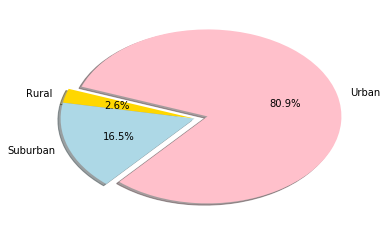

In [8]:
# Calculate Driver Percents
city_drivers_byType = city_data.groupby(["type"]).sum()["driver_count"]

# Build Pie Charts
colors = ("gold", "lightblue","pink")
plt.pie(city_drivers_byType, labels = city_drivers_byType.index.values, colors = colors, autopct="%1.1f%%", 
        startangle = 160, explode =(0,0,0.1), shadow = True)

# Save Figure
plt.savefig("../Images/Total_drivers_by_City_Type.png")
plt.show()